In [274]:
def extract_variables(input_string):
    #./scraper/data/scaph_1_acme.sh_1_0d8a314bcf32c7705f0be11527d34d3b4ce0fa79.json
    file = input_string.split('/')[-1]
    #scaph_1_acme.sh_1_0d8a314bcf32c7705f0be11527d34d3b4ce0fa79.json
    parts = file.split('_')
    return parts[-5], parts[-4], parts[-3], parts[-2], parts[-1],


def format_name(filename, pattern):
    variables = extract_variables(filename)
    if not variables:
        return None

    rtype, repetition, name, smell, githash = variables

    # Replace the placeholders in the pattern with the extracted variables
    nice_name = pattern
    nice_name = nice_name.replace("{rtype}", rtype)
    nice_name = nice_name.replace("{repetition}", repetition)
    nice_name = nice_name.replace("{name}", name)
    nice_name = nice_name.replace("{smell}", smell)
    nice_name = nice_name.replace("{githash}", githash)

    return nice_name

In [275]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import re

report_directory = "./scraper/data"
available_reports = []
for filename in os.listdir(report_directory):
    if filename.endswith('.json'):
        available_reports.append(os.path.join(report_directory, filename))


In [289]:
rtype = "scaph"
repetition = "1"
name = ".*"
smell = "1"
githash = ".*"
selected_reports = list(
    filter(lambda s: re.compile(rf'.*{rtype}_{repetition}_{name}_{smell}_{githash}.*').match(s), available_reports))

selected_reports, len(selected_reports)

(['./scraper/data/scaph_1_face_recognition_1_2e2dccea9dd0ce730c8d464d0f67c6eebb40c9d1.json',
  './scraper/data/scaph_1_k9s_1_626bde11f31e08cf8081bced7d911f6d121582fc.json',
  './scraper/data/scaph_1_tts_1_dbf1a08a0d4e47fdad6172e433eeb34bc6b13b4e.json',
  './scraper/data/scaph_1_acme.sh_1_0d8a314bcf32c7705f0be11527d34d3b4ce0fa79.json',
  './scraper/data/scaph_1_chatgpt-web_1_574aac2ff1091b0cda5c0f68139275db4bf6a5e3.json',
  './scraper/data/scaph_1_freqtrade_1_c2275009a8033ff7ad4f040e64bcc0bed40c2aa6.json',
  './scraper/data/scaph_1_chatgpt-retrieval-plugin_1_b28ddce58474441da332d4e15c6dd60ddaa953ab.json',
  './scraper/data/scaph_1_hackingtool_1_fbffd2ef27f66ed8d47a97c6b49659c8740806cb.json',
  './scraper/data/scaph_1_remote-jobs_1_a87987fe110d19277442913fd30714f661bed8d2.json',
  './scraper/data/scaph_1_chatgpt-next-web_1_c359b30763224d4e5cb264adc02b5436982e3493.json',
  './scraper/data/scaph_1_rustdesk_1_285e974d1a52c891d5fcc28e963d724e085558bc.json',
  './scraper/data/scaph_1_devdocs_

In [277]:
import pandas as pd


def read_file(file_path):
    with open(file_path, 'r') as file:
        file_data = json.load(file)
        values = file_data['result'][0]['values']
        index = file_path.split('/')[-1]
        readings = [float(v[1]) for v in values]
        return index, readings


data_per_file = [read_file(report) for report in selected_reports]
indexes = [data[0] for data in data_per_file]
values = [data[1] for data in data_per_file]
df = pd.DataFrame(values, index=indexes)
df = df.transpose()


# Pattern for renaming
pattern = "{name}-{smell}-{repetition}"
# Rename columns using the pattern
new_columns = {col: format_name(col, pattern) for col in df.columns}
df.rename(columns=new_columns, inplace=True)
df

,rustdesk-3-3,rustdesk-2-2,rustdesk-7-1,rustdesk-2-1,rustdesk-5-3,rustdesk-7-2,rustdesk-5-1,rustdesk-3-1,rustdesk-6-3,rustdesk-2-2,...,rustdesk-4-3,rustdesk-4-1,rustdesk-6-1,rustdesk-5-2,rustdesk-4-2,rustdesk-7-1,rustdesk-1-1,rustdesk-6-1,rustdesk-1-2,rustdesk-3-1
0,6.391757,8.664272,6.811419,6.042913,6.631497,6.862314,8.854636,6.423077,6.202206,7.255154,...,6.466455,18.441577,8.481061,6.800194,6.392933,7.871571,8.223538,6.575331,8.511391,8.001907
1,6.391757,8.664272,6.632037,6.387621,6.329930,6.818045,8.654770,6.423077,6.202206,6.385275,...,6.683225,18.441577,8.481061,6.800194,6.392933,7.871571,8.611675,6.575331,8.511391,8.001907
2,6.391757,8.218800,6.632037,6.387621,6.329930,6.818045,8.654770,7.035572,6.679486,6.385275,...,6.683225,18.656418,8.821052,6.637303,6.418830,7.947103,8.611675,7.001180,8.474866,8.001907
3,6.812331,8.218800,6.763176,6.868848,6.329930,7.166696,8.654770,7.035572,6.679486,6.385275,...,6.480292,18.656418,8.821052,6.637303,6.418830,7.947103,8.545491,7.001180,8.474866,8.495695
4,6.812331,8.218800,6.763176,6.868848,6.276385,7.166696,8.775693,6.682870,6.679486,6.325410,...,6.480292,18.656418,8.821052,6.484001,6.418830,7.843534,8.545491,6.694028,8.474866,8.495695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,6.324318,8.213398,6.220118,6.504597,6.163540,6.312484,7.644007,18.310323,7.055792,6.123178,...,6.512406,6.396458,8.095740,7.166618,6.238047,7.655709,7.914437,6.779914,7.876449,7.905682
1197,6.450800,8.267159,6.220118,6.504597,6.163540,6.297224,8.487886,18.572930,6.458078,6.798347,...,6.321653,6.336772,8.095740,6.664836,6.587411,7.655709,8.763740,6.464520,8.345884,8.107613
1198,6.450800,8.267159,6.220118,6.077594,6.242808,6.297224,8.487886,18.572930,6.458078,6.798347,...,6.321653,6.336772,7.697884,6.664836,6.587411,8.064537,8.763740,6.464520,8.345884,8.107613
1199,6.371163,8.108126,6.630268,6.077594,6.242808,6.705141,8.159821,18.218239,6.820171,6.920113,...,6.642154,6.163290,7.697884,6.664836,6.587411,8.064537,8.130815,6.337642,8.000009,7.634358


In [278]:
df = df[~(np.abs(df-df.mean()) > (3*df.std()))]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

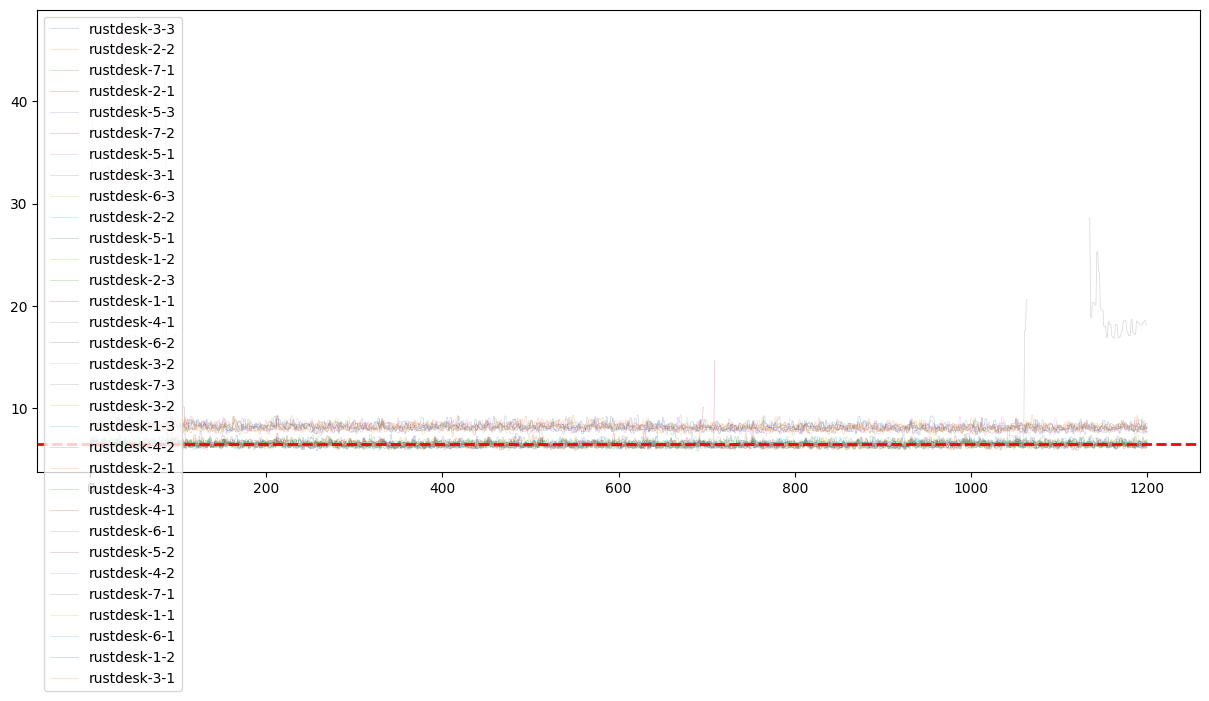

In [279]:
import matplotlib.pyplot as plt

ax = df.plot(kind='line', figsize=(15, 6), linewidth=0.5, alpha=0.3)  # Thinner lines and less opacity for actual readings

# Calculate the averages for each column
averages = df.mean()

# Plot the averages as a horizontal line
for col in df.columns:
    plt.axhline(y=averages[col], color='red', linestyle='--', linewidth=2, label=f'Avg {col}')  # Thicker and colored lines for averages

# Adding the legend
plt.legend()
plt.title('Averages for 3 repetitions for "acme.sh" - No docker smells')
plt.xlabel('Time (s)')
plt.ylabel('Values')

# Modify the x-axis to show the time in seconds
ticks = ax.get_xticks()
ax.set_xticklabels([f'{int(tick * 0.5)}' for tick in ticks])

plt.show()

In [ ]:
df.to_csv(os.getcwd() + '/data.csv')

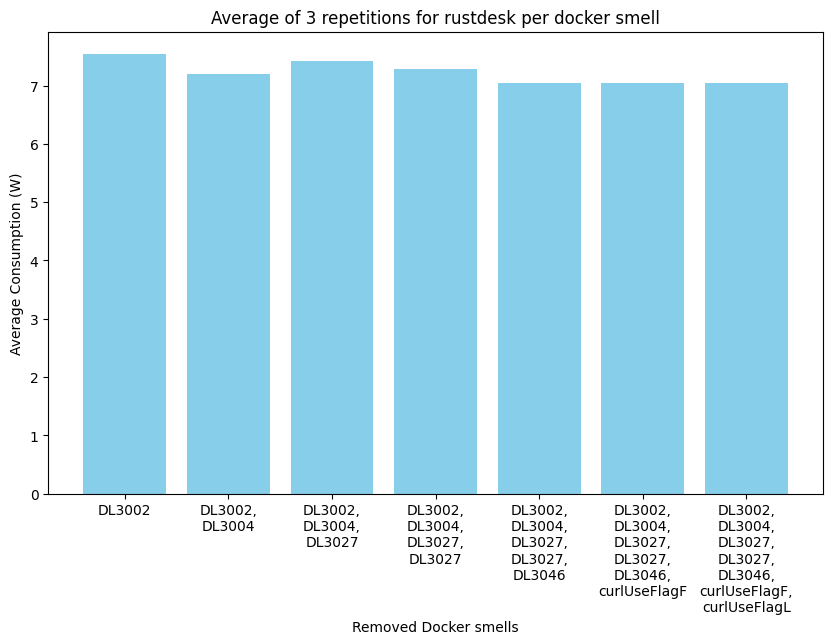

In [288]:
averages = df.mean()
grouped_columns = {}
for col,values in averages.items():
    prefix = col[:-2]  # Assuming the prefix is the first character
    if prefix not in grouped_columns:
        grouped_columns[prefix] = []
    grouped_columns[prefix].append(col)

grouped_means = {}
for prefix, cols in grouped_columns.items():
    grouped_means[prefix] = averages[cols].mean()

sorted_data = dict(sorted(grouped_means.items()))

def accumulate_values(arr):
    accumulated_array = []
    current_sum=[]
    for value in arr:
        current_sum.append(value)
        accumulated_array.append(',\n'.join(current_sum))
    return accumulated_array

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(accumulate_values([
            "DL3002",
        "DL3004",
        "DL3027",
        "DL3027",
        "DL3046",
        "curlUseFlagF",
        "curlUseFlagL"
]), sorted_data.values(), color='skyblue')

# Adding titles and labels
plt.title(f'Average of 3 repetitions for {name} per docker smell')
plt.xlabel('Removed Docker smells')
plt.ylabel('Average Consumption (W)')

plt.xticks(rotation=0)
# Display the plot
plt.show()